Численное решение...

Аналитическое решение...
Аналитические параметры:
λ1 = -0.4079, λ2 = 0.9822
Частное решение x_p = -0.0195
Константы: C1 = 0.084435, C2 = 0.035065
Проверка: C1 + C2 = 0.119500 (должно быть 0.119500)


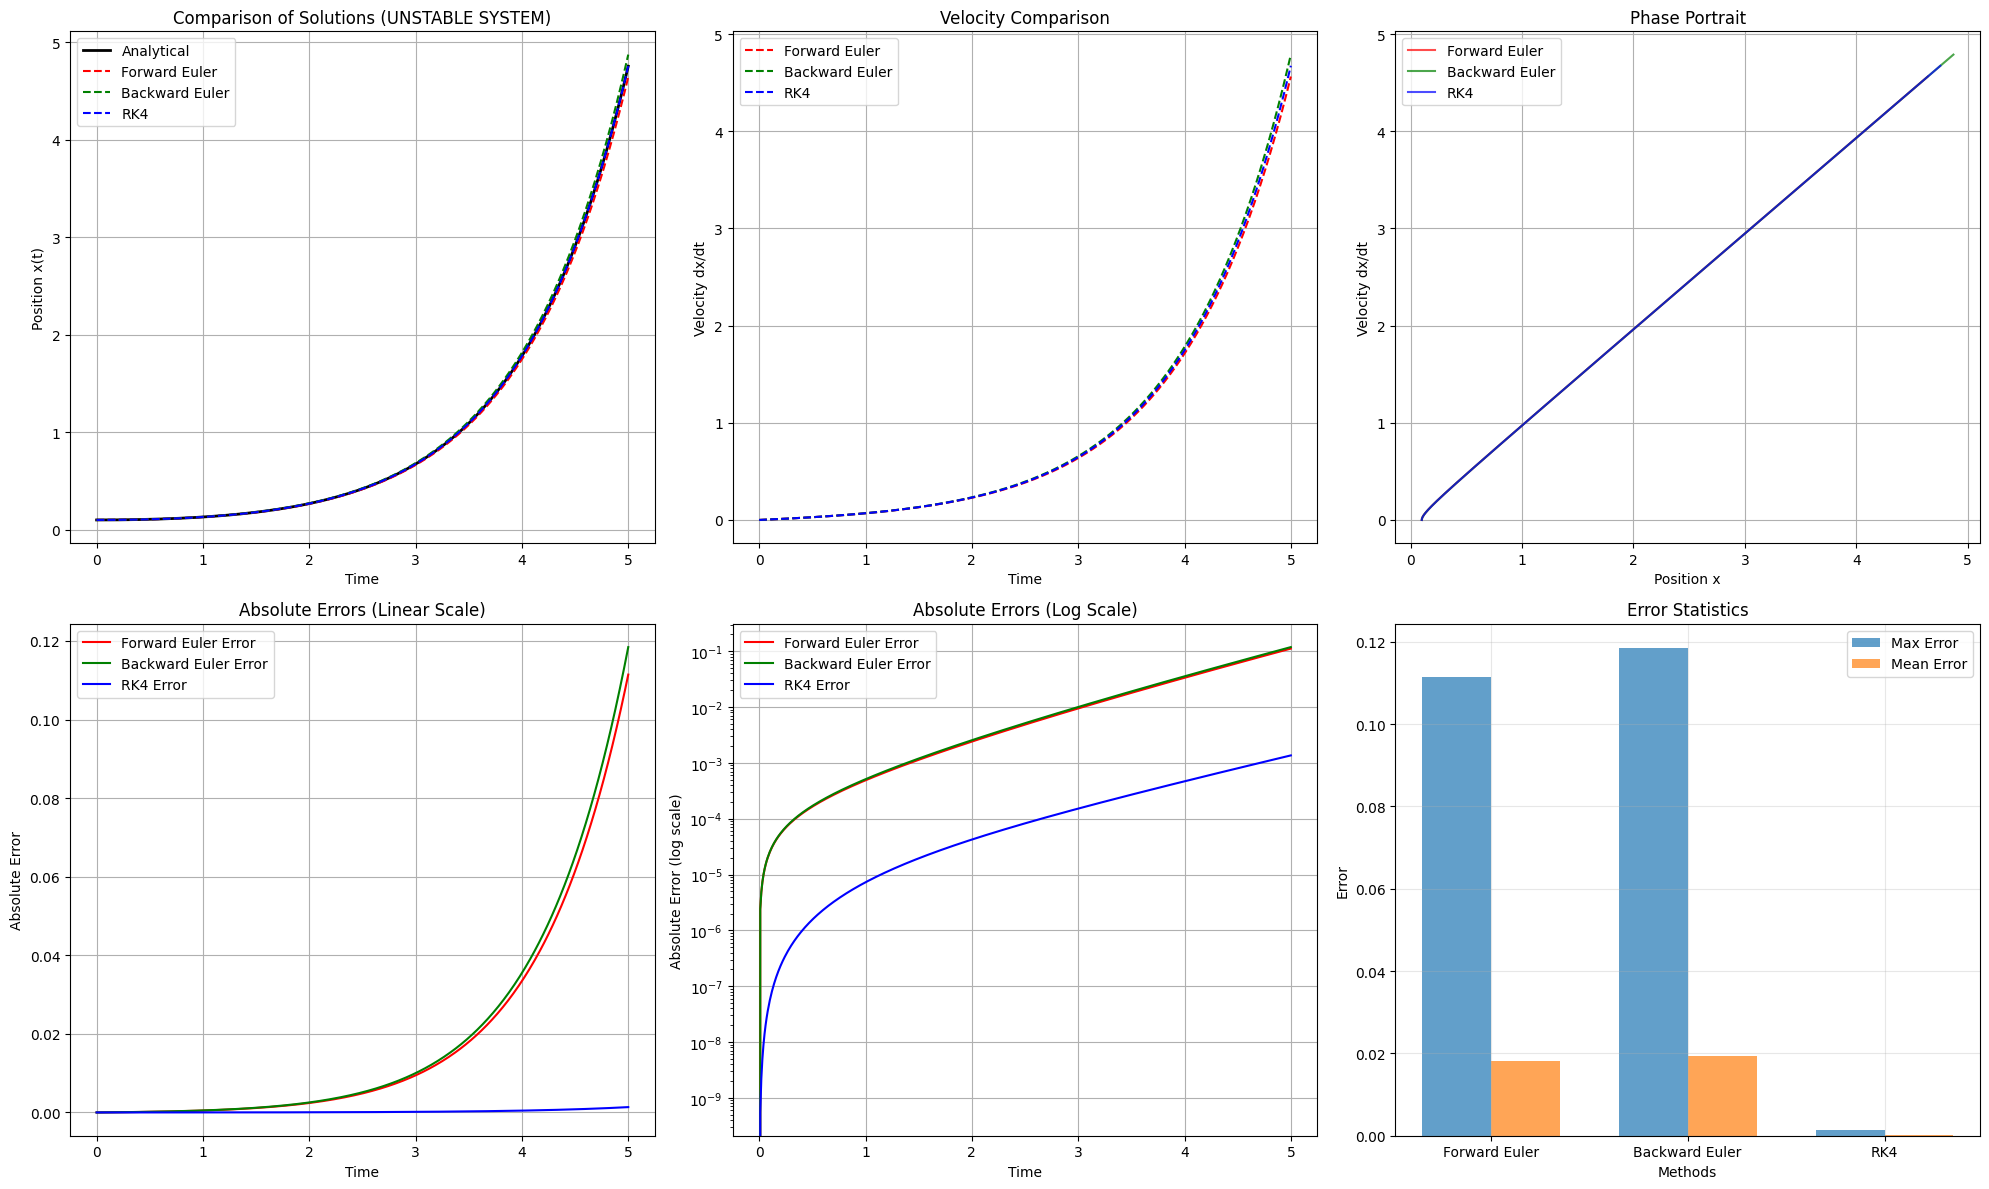


СРАВНЕНИЕ ЧИСЛЕННЫХ МЕТОДОВ
Уравнение: 6.39·x'' + -3.67·x' + -2.56·x = 0.05
Начальные условия: x(0) = 0.1, x'(0) = 0.0
Шаг времени: h = 0.01
Время симуляции: Tf = 5.0
СИСТЕМА НЕУСТОЙЧИВА (λ2 = 0.9822 > 0)

МАКСИМАЛЬНЫЕ АБСОЛЮТНЫЕ ОШИБКИ:
  Явный Эйлер:    1.11e-01
  Неявный Эйлер:  1.18e-01
  Рунге-Кутта 4:  1.36e-03

СРЕДНИЕ АБСОЛЮТНЫЕ ОШИБКИ:
  Явный Эйлер:    1.82e-02
  Неявный Эйлер:  1.94e-02
  Рунге-Кутта 4:  2.47e-04

ЗНАЧЕНИЯ В КОНЕЧНЫЙ МОМЕНТ t = 5.0:
  Аналитическое:  4.752458
  Явный Эйлер:    4.641014
  Неявный Эйлер:  4.870898
  Рунге-Кутта 4:  4.753818

АНАЛИЗ УСТОЙЧИВОСТИ С РАЗНЫМИ ШАГАМИ
Аналитические параметры:
λ1 = -0.4079, λ2 = 0.9822
Частное решение x_p = -0.0195
Константы: C1 = 0.084435, C2 = 0.035065
Проверка: C1 + C2 = 0.119500 (должно быть 0.119500)
h = 0.001: Макс. ошибка = 2.05e-04 (УСТОЙЧИВО)
Аналитические параметры:
λ1 = -0.4079, λ2 = 0.9822
Частное решение x_p = -0.0195
Константы: C1 = 0.084435, C2 = 0.035065
Проверка: C1 + C2 = 0.119500 (должно быть 0.119

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Коэффициенты в соответствии с вариантом
a = 6.39
b = -3.67
c = -2.56
d = 0.05

def system_dynamics(x):

    x_pos = x[0]
    x_vel = x[1]

    x_acc = (d - b*x_vel - c*x_pos) / a

    return np.array([x_vel, x_acc])

def analytical_solution(t, x0):

    lambda1 = -0.4079
    lambda2 = 0.9822

    # Частное решение
    x_particular = -0.0195

    # Начальные условия: x(0) = 0.1, x'(0) = 0
    x0_pos = x0[0]  # 0.1
    x0_vel = x0[1]  # 0

    A = np.array([[1, 1],
                  [lambda1, lambda2]])
    B = np.array([x0_pos - x_particular, x0_vel])
    C1, C2 = np.linalg.solve(A, B)

    print(f"Аналитические параметры:")
    print(f"λ1 = {lambda1}, λ2 = {lambda2}")
    print(f"Частное решение x_p = {x_particular}")
    print(f"Константы: C1 = {C1:.6f}, C2 = {C2:.6f}")
    print(f"Проверка: C1 + C2 = {C1 + C2:.6f} (должно быть {x0_pos - x_particular:.6f})")

    return C1*np.exp(lambda1*t) + C2*np.exp(lambda2*t) + x_particular

def forward_euler(fun, x0, Tf, h):

    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0
    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k] + h * fun(x_hist[:, k])

    return x_hist, t

def backward_euler(fun, x0, Tf, h, tol=1e-8, max_iter=100):

    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        x_hist[:, k + 1] = x_hist[:, k]

        for i in range(max_iter):
            x_next = x_hist[:, k] + h * fun(x_hist[:, k + 1])
            error = np.linalg.norm(x_next - x_hist[:, k + 1])
            x_hist[:, k + 1] = x_next

            if error < tol:
                break

    return x_hist, t

def runge_kutta4(fun, x0, Tf, h):

    t = np.arange(0, Tf + h, h)
    x_hist = np.zeros((len(x0), len(t)))
    x_hist[:, 0] = x0

    for k in range(len(t) - 1):
        k1 = fun(x_hist[:, k])
        k2 = fun(x_hist[:, k] + 0.5 * h * k1)
        k3 = fun(x_hist[:, k] + 0.5 * h * k2)
        k4 = fun(x_hist[:, k] + h * k3)

        x_hist[:, k + 1] = x_hist[:, k] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4)

    return x_hist, t

x0 = np.array([0.1, 0.0])
Tf = 5.0
h = 0.01

print("Численное решение...")
x_fe, t_fe = forward_euler(system_dynamics, x0, Tf, h)
x_be, t_be = backward_euler(system_dynamics, x0, Tf, h)
x_rk4, t_rk4 = runge_kutta4(system_dynamics, x0, Tf, h)

print("\nАналитическое решение...")
x_analytical = analytical_solution(t_fe, x0)

error_fe = np.abs(x_fe[0, :] - x_analytical)
error_be = np.abs(x_be[0, :] - x_analytical)
error_rk4 = np.abs(x_rk4[0, :] - x_analytical)

plt.figure(figsize=(20, 12))

# График 1: Сравнение решений
plt.subplot(2, 3, 1)
plt.plot(t_fe, x_analytical, 'k-', linewidth=2, label='Analytical')
plt.plot(t_fe, x_fe[0, :], 'r--', label='Forward Euler')
plt.plot(t_be, x_be[0, :], 'g--', label='Backward Euler')
plt.plot(t_rk4, x_rk4[0, :], 'b--', label='RK4')
plt.xlabel('Time')
plt.ylabel('Position x(t)')
plt.legend()
plt.title('Comparison of Solutions (UNSTABLE SYSTEM)')
plt.grid(True)

# График 2: Сравнение скоростей
plt.subplot(2, 3, 2)
plt.plot(t_fe, x_fe[1, :], 'r--', label='Forward Euler')
plt.plot(t_be, x_be[1, :], 'g--', label='Backward Euler')
plt.plot(t_rk4, x_rk4[1, :], 'b--', label='RK4')
plt.xlabel('Time')
plt.ylabel('Velocity dx/dt')
plt.legend()
plt.title('Velocity Comparison')
plt.grid(True)

# График 3: Фазовый портрет
plt.subplot(2, 3, 3)
plt.plot(x_fe[0, :], x_fe[1, :], 'r-', alpha=0.7, label='Forward Euler')
plt.plot(x_be[0, :], x_be[1, :], 'g-', alpha=0.7, label='Backward Euler')
plt.plot(x_rk4[0, :], x_rk4[1, :], 'b-', alpha=0.7, label='RK4')
plt.xlabel('Position x')
plt.ylabel('Velocity dx/dt')
plt.legend()
plt.title('Phase Portrait')
plt.grid(True)

# График 4: Ошибки (линейная шкала)
plt.subplot(2, 3, 4)
plt.plot(t_fe, error_fe, 'r-', label='Forward Euler Error')
plt.plot(t_be, error_be, 'g-', label='Backward Euler Error')
plt.plot(t_rk4, error_rk4, 'b-', label='RK4 Error')
plt.xlabel('Time')
plt.ylabel('Absolute Error')
plt.legend()
plt.title('Absolute Errors (Linear Scale)')
plt.grid(True)

# График 5: Ошибки (логарифмическая шкала)
plt.subplot(2, 3, 5)
plt.semilogy(t_fe, error_fe, 'r-', label='Forward Euler Error')
plt.semilogy(t_be, error_be, 'g-', label='Backward Euler Error')
plt.semilogy(t_rk4, error_rk4, 'b-', label='RK4 Error')
plt.xlabel('Time')
plt.ylabel('Absolute Error (log scale)')
plt.legend()
plt.title('Absolute Errors (Log Scale)')
plt.grid(True)

# График 6: Статистика ошибок
plt.subplot(2, 3, 6)
methods = ['Forward Euler', 'Backward Euler', 'RK4']
max_errors = [np.max(error_fe), np.max(error_be), np.max(error_rk4)]
mean_errors = [np.mean(error_fe), np.mean(error_be), np.mean(error_rk4)]

x_pos = np.arange(len(methods))
width = 0.35

plt.bar(x_pos - width/2, max_errors, width, label='Max Error', alpha=0.7)
plt.bar(x_pos + width/2, mean_errors, width, label='Mean Error', alpha=0.7)

plt.xlabel('Methods')
plt.ylabel('Error')
plt.title('Error Statistics')
plt.xticks(x_pos, methods)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Вывод численных результатов
print("\n" + "=" * 60)
print("СРАВНЕНИЕ ЧИСЛЕННЫХ МЕТОДОВ")
print("=" * 60)
print(f"Уравнение: {a}·x'' + {b}·x' + {c}·x = {d}")
print(f"Начальные условия: x(0) = {x0[0]}, x'(0) = {x0[1]}")
print(f"Шаг времени: h = {h}")
print(f"Время симуляции: Tf = {Tf}")
print(f"СИСТЕМА НЕУСТОЙЧИВА (λ2 = 0.9822 > 0)")
print()

print("МАКСИМАЛЬНЫЕ АБСОЛЮТНЫЕ ОШИБКИ:")
print(f"  Явный Эйлер:    {np.max(error_fe):.2e}")
print(f"  Неявный Эйлер:  {np.max(error_be):.2e}")
print(f"  Рунге-Кутта 4:  {np.max(error_rk4):.2e}")
print()

print("СРЕДНИЕ АБСОЛЮТНЫЕ ОШИБКИ:")
print(f"  Явный Эйлер:    {np.mean(error_fe):.2e}")
print(f"  Неявный Эйлер:  {np.mean(error_be):.2e}")
print(f"  Рунге-Кутта 4:  {np.mean(error_rk4):.2e}")
print()

print(f"ЗНАЧЕНИЯ В КОНЕЧНЫЙ МОМЕНТ t = {Tf}:")
print(f"  Аналитическое:  {x_analytical[-1]:.6f}")
print(f"  Явный Эйлер:    {x_fe[0, -1]:.6f}")
print(f"  Неявный Эйлер:  {x_be[0, -1]:.6f}")
print(f"  Рунге-Кутта 4:  {x_rk4[0, -1]:.6f}")

# Анализ устойчивости с разными шагами
print("\n" + "=" * 60)
print("АНАЛИЗ УСТОЙЧИВОСТИ С РАЗНЫМИ ШАГАМИ")
print("=" * 60)

time_steps = [0.001, 0.01, 0.05, 0.1]
for h_test in time_steps:
    x_fe_test, t_fe_test = forward_euler(system_dynamics, x0, 2.0, h_test)
    x_analytical_test = analytical_solution(t_fe_test, x0)
    error = np.max(np.abs(x_fe_test[0, :] - x_analytical_test))

    stability = "УСТОЙЧИВО" if error < 1.0 else "НЕУСТОЙЧИВО"
    print(f"h = {h_test:.3f}: Макс. ошибка = {error:.2e} ({stability})")